In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/collage-image-dataset/sample/test2.JPG
/kaggle/input/collage-image-dataset/sample/test1.JPG


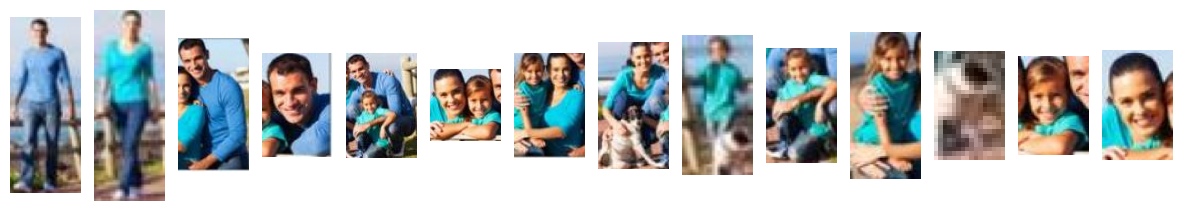

Cropped images saved at: ['/kaggle/working/cropped_images_1.jpg', '/kaggle/working/cropped_images_2.jpg', '/kaggle/working/cropped_images_3.jpg', '/kaggle/working/cropped_images_4.jpg', '/kaggle/working/cropped_images_5.jpg', '/kaggle/working/cropped_images_6.jpg', '/kaggle/working/cropped_images_7.jpg', '/kaggle/working/cropped_images_8.jpg', '/kaggle/working/cropped_images_9.jpg', '/kaggle/working/cropped_images_10.jpg', '/kaggle/working/cropped_images_11.jpg', '/kaggle/working/cropped_images_12.jpg', '/kaggle/working/cropped_images_13.jpg', '/kaggle/working/cropped_images_14.jpg']


In [10]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/collage-image-dataset/sample/test2.JPG"
image = Image.open(image_path).convert("RGB")

# Load a pre-trained YOLO model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Transform the image
image_tensor = transform(image).unsqueeze(0)

# Perform the detection
with torch.no_grad():
    predictions = model(image_tensor)

# Get the bounding boxes, scores, and labels
predictions = predictions[0]
boxes = predictions['boxes']
scores = predictions['scores']

# Filter out weak detections
threshold = 0.5
filtered_boxes = boxes[scores > threshold]

# Crop and save the individual images
cropped_images = []
for i, box in enumerate(filtered_boxes):
    cropped_image = image.crop(box.tolist())
    cropped_image_path = f"/kaggle/working/cropped_images_{i + 1}.jpg"
    cropped_image.save(cropped_image_path)
    cropped_images.append(cropped_image_path)

# Display the results
fig, ax = plt.subplots(1, len(cropped_images), figsize=(15, 5))
for i, cropped_image_path in enumerate(cropped_images):
    cropped_image = Image.open(cropped_image_path)
    ax[i].imshow(cropped_image)
    ax[i].axis('off')
plt.show()

print(f"Cropped images saved at: {cropped_images}")


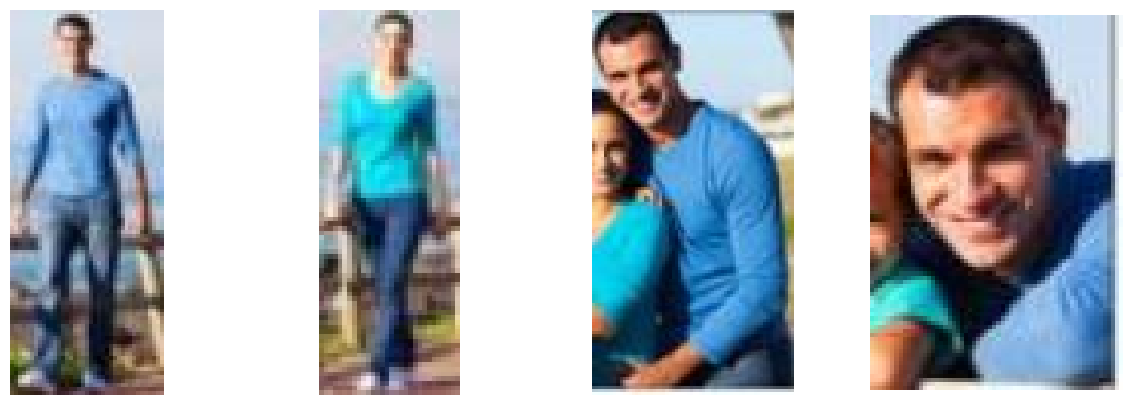

Cropped images saved at: ['/kaggle/working/out1.jpg', '/kaggle/working/out2.jpg', '/kaggle/working/out3.jpg', '/kaggle/working/out4.jpg']


In [17]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the collage image
image_path = "/kaggle/input/collage-image-dataset/sample/test2.JPG"
image = Image.open(image_path).convert("RGB")

# Load a pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Transform the image
image_tensor = transform(image).unsqueeze(0)

# Perform the detection
with torch.no_grad():
    predictions = model(image_tensor)

# Get the bounding boxes, scores, and labels
predictions = predictions[0]
boxes = predictions['boxes']
scores = predictions['scores']

# Filter out weak detections
threshold = 0.5
filtered_boxes = boxes[scores > threshold]
filtered_scores = scores[scores > threshold]

# Sort the boxes by scores in descending order and select the top 4
if len(filtered_boxes) > 4:
    top_indices = filtered_scores.argsort(descending=True)[:4]
    filtered_boxes = filtered_boxes[top_indices]
elif len(filtered_boxes) < 4:
    raise ValueError(f"Expected to detect exactly 4 images in the collage, but detected {len(filtered_boxes)}.")

# Crop and save the individual images
cropped_images = []
for i, box in enumerate(filtered_boxes):
    cropped_image = image.crop(box.tolist())
    cropped_image_path = f"/kaggle/working/out{i + 1}.jpg"
    cropped_image.save(cropped_image_path)
    cropped_images.append(cropped_image_path)

# Display the results
fig, ax = plt.subplots(1, len(cropped_images), figsize=(15, 5))
for i, cropped_image_path in enumerate(cropped_images):
    cropped_image = Image.open(cropped_image_path)
    ax[i].imshow(cropped_image)
    ax[i].axis('off')
plt.show()

print(f"Cropped images saved at: {cropped_images}")
